In [22]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import datasets
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.neural_network import MLPRegressor
from sklearn import linear_model
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score

In [23]:
# Training a multi layer percetro for data with two classes
data = np.loadtxt(r'\Users\alana\Documents\TecMTY\RoboticaInteligente\DeepLearning\red_neronal\mist_data\misterious_data_1.txt')
x = data[:,1:]
y = data[:,0]

# Train MLP classifier with all available observations
clf = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=10000)
clf.fit(x, y)

# Applying cross validation
kf = KFold(n_splits=5, shuffle = True)

acc = 0
for train_index, test_index in kf.split(x):
    # Training phase
    x_train = x[train_index, :]
    y_train = y[train_index]

    clf_i = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=10000)
    clf_i.fit(x_train, y_train)

    # Test phase
    x_test = x[test_index, :]
    y_test = y[test_index]    
    y_pred = clf_i.predict(x_test)

    # Calculate confusion matrix and model performance
    cm = confusion_matrix(y_test, y_pred)
    acc_i = (cm[0,0]+cm[1,1])/len(y_test)    
    print('acc = ', acc_i)

    acc += acc_i 

acc = acc/5
print('ACC = ', acc)

acc =  0.8018867924528302
acc =  0.8207547169811321
acc =  0.8018867924528302
acc =  0.7142857142857143
acc =  0.7714285714285715
ACC =  0.7820485175202156


In [24]:
# Training a multi perceptron using data with four classes
data_two = np.loadtxt(r'\Users\alana\Documents\TecMTY\RoboticaInteligente\DeepLearning\red_neronal\mist_data\misterious_data_4.txt')
x = data[:,1:]
y = data[:,0]

# Train MLP classifier with all available observations
clf = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=10000)
clf.fit(x, y)

# Applying cross validation
kf = KFold(n_splits=5, shuffle = True)

acc = 0
for train_index, test_index in kf.split(x):
    # Training phase
    x_train = x[train_index, :]
    y_train = y[train_index]

    clf_i = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=10000)
    clf_i.fit(x_train, y_train)

    # Test phase
    x_test = x[test_index, :]
    y_test = y[test_index]    
    y_pred = clf_i.predict(x_test)

    # Calculate confusion matrix and model performance
    cm = confusion_matrix(y_test, y_pred)
    acc_i = np.trace(cm) / np.sum(cm)   
    print('acc = ', acc_i)

    acc += acc_i 

acc = acc/5
print('ACC = ', acc)

acc =  0.7547169811320755
acc =  0.7924528301886793
acc =  0.7830188679245284
acc =  0.8095238095238095
acc =  0.7142857142857143
ACC =  0.7707996406109615


-----------Variable 0
MSE:  5742.450512776825
R^2:  0.03160843547422232


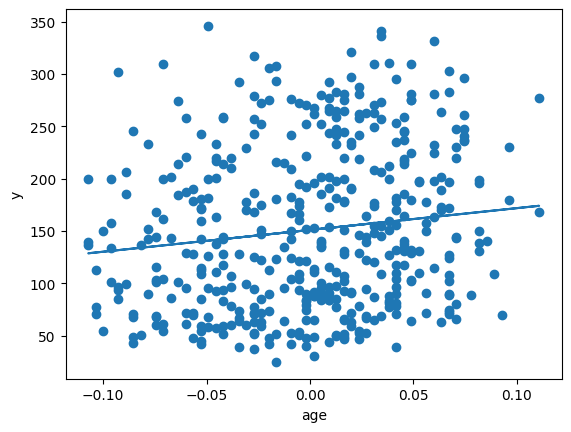

-----------Variable 1
MSE:  5922.351746699911
R^2:  0.001270370393596787


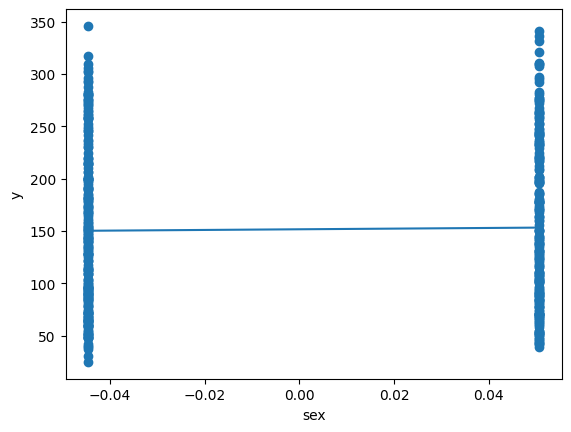

-----------Variable 2
MSE:  3905.964619467648
R^2:  0.341308526662507


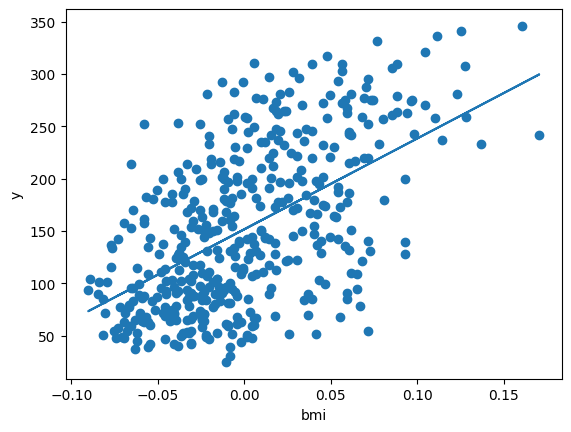

-----------Variable 3
MSE:  4809.288786387345
R^2:  0.1889743443598536


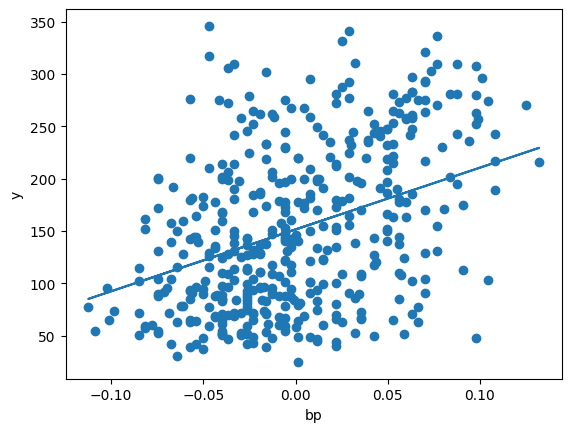

-----------Variable 4
MSE:  5695.232828329537
R^2:  0.03957110005678266


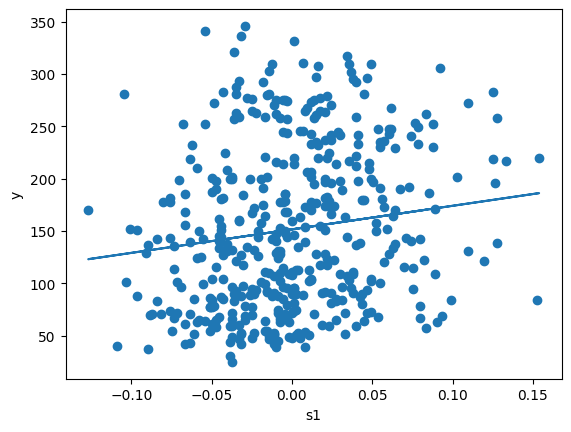

-----------Variable 5
MSE:  5787.6681444416
R^2:  0.023983054467529685


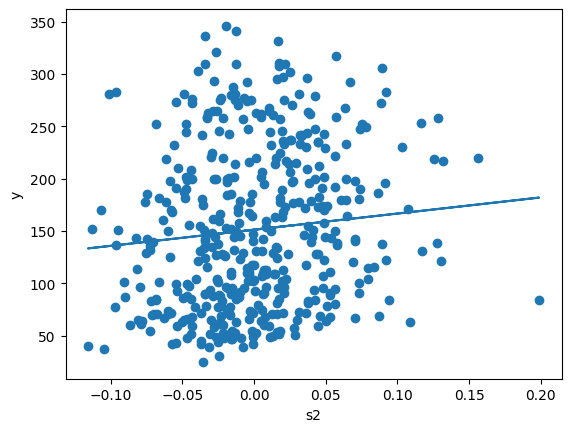

-----------Variable 6
MSE:  5061.203457808217
R^2:  0.14649212492383634


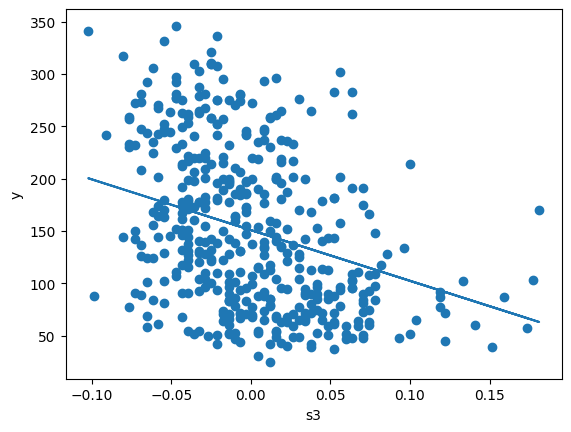

-----------Variable 7
MSE:  4851.177698144444
R^2:  0.18191030981528367


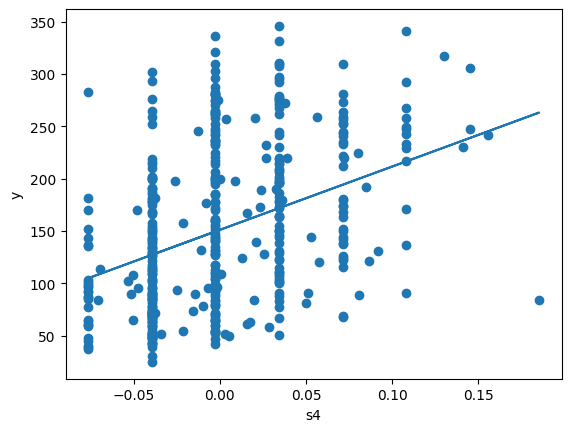

-----------Variable 8
MSE:  4058.8837149895903
R^2:  0.3155206575587378


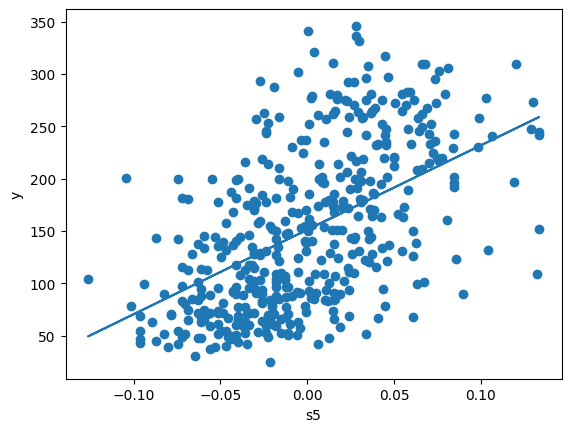

-----------Variable 9
MSE:  5105.250395409388
R^2:  0.13906416664691923


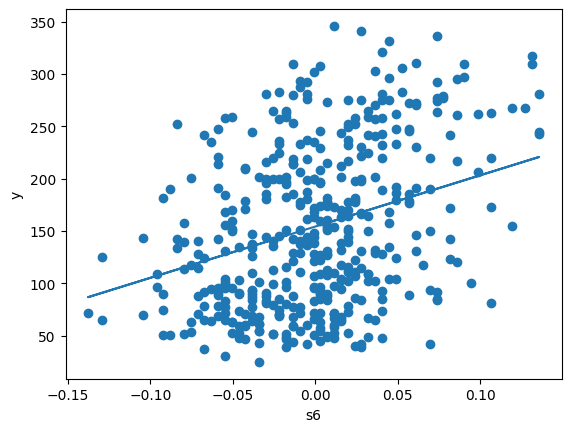

Average MSE:  5093.94719044545
Average R^2:  0.14097030903592692


In [25]:
# Using diabetes dataset to evaluate in a multilayer perceptron

#Loading data and checking it
diabetes = datasets.load_diabetes()
x = diabetes.data
y = diabetes.target
features = diabetes.feature_names
n_features = len(features)

# Entrenando el regresor MLP
regressor = MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=10000)
regressor.fit(x, y)

# Aplicando validacion cruzada
kf = KFold(n_splits=5, shuffle=True)

mse = 0
r2 = 0

# Train MLP regressor for one variable
for var in range(n_features):
    print('-----------Variable', var)

    regressor_i = MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=10000)
    regressor_i.fit(x[:, var].reshape(-1, 1), y)

    y_pred = regressor_i.predict(x[:, var].reshape(-1, 1))
    mse_i = mean_squared_error(y, y_pred)
    r2_i = r2_score(y, y_pred)

    mse += mse_i
    r2 += r2_i

    print('MSE: ', mse_i)
    print('R^2: ', r2_i)

    plt.scatter(x[:, var], y)
    plt.plot(x[:, var], y_pred)
    plt.xlabel(features[var])
    plt.ylabel('y')
    plt.show()

mse /= n_features
r2 /= n_features

print('Average MSE: ', mse)
print('Average R^2: ', r2)